In [2]:
import cv2

In [3]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
flags

['COLOR_BAYER_BG2BGR',
 'COLOR_BAYER_BG2BGRA',
 'COLOR_BAYER_BG2BGR_EA',
 'COLOR_BAYER_BG2BGR_VNG',
 'COLOR_BAYER_BG2GRAY',
 'COLOR_BAYER_BG2RGB',
 'COLOR_BAYER_BG2RGBA',
 'COLOR_BAYER_BG2RGB_EA',
 'COLOR_BAYER_BG2RGB_VNG',
 'COLOR_BAYER_BGGR2BGR',
 'COLOR_BAYER_BGGR2BGRA',
 'COLOR_BAYER_BGGR2BGR_EA',
 'COLOR_BAYER_BGGR2BGR_VNG',
 'COLOR_BAYER_BGGR2GRAY',
 'COLOR_BAYER_BGGR2RGB',
 'COLOR_BAYER_BGGR2RGBA',
 'COLOR_BAYER_BGGR2RGB_EA',
 'COLOR_BAYER_BGGR2RGB_VNG',
 'COLOR_BAYER_GB2BGR',
 'COLOR_BAYER_GB2BGRA',
 'COLOR_BAYER_GB2BGR_EA',
 'COLOR_BAYER_GB2BGR_VNG',
 'COLOR_BAYER_GB2GRAY',
 'COLOR_BAYER_GB2RGB',
 'COLOR_BAYER_GB2RGBA',
 'COLOR_BAYER_GB2RGB_EA',
 'COLOR_BAYER_GB2RGB_VNG',
 'COLOR_BAYER_GBRG2BGR',
 'COLOR_BAYER_GBRG2BGRA',
 'COLOR_BAYER_GBRG2BGR_EA',
 'COLOR_BAYER_GBRG2BGR_VNG',
 'COLOR_BAYER_GBRG2GRAY',
 'COLOR_BAYER_GBRG2RGB',
 'COLOR_BAYER_GBRG2RGBA',
 'COLOR_BAYER_GBRG2RGB_EA',
 'COLOR_BAYER_GBRG2RGB_VNG',
 'COLOR_BAYER_GR2BGR',
 'COLOR_BAYER_GR2BGRA',
 'COLOR_BAYER_GR2BGR_

In [4]:
len(flags)

346

In [5]:
flags[40]

'COLOR_BAYER_GR2GRAY'

In [6]:
import matplotlib.pyplot as plt
import numpy as np

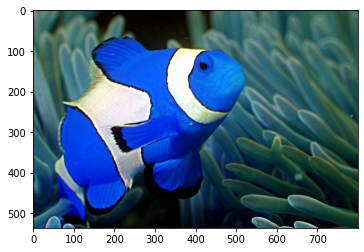

In [7]:
nemo = cv2.imread('Clown_fish.jpg')
plt.imshow(nemo)
plt.show()

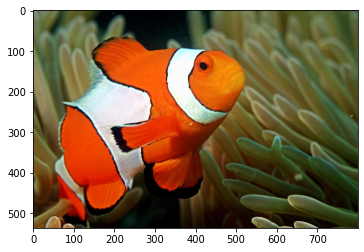

In [9]:
nemo = cv2.cvtColor(nemo, cv2.COLOR_BGR2RGB)
plt.imshow(nemo)
plt.show()

In [10]:
hsv_nemo = cv2.cvtColor(nemo, cv2.COLOR_RGB2HSV)

In [11]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

In [12]:
from matplotlib.colors import hsv_to_rgb

In [93]:
lo_square = np.full((10, 10, 3), light_orange, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_orange, dtype=np.uint8) / 255.0

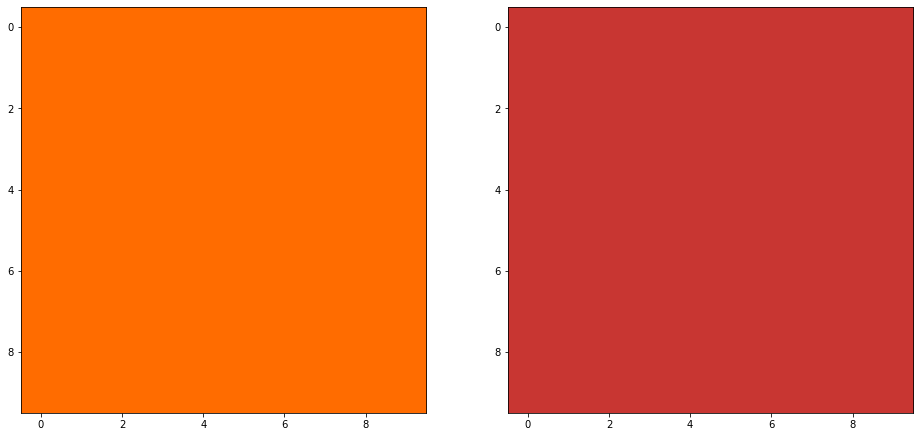

In [96]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.savefig('fig.jpg')
plt.show()

In [97]:
mask = cv2.inRange(hsv_nemo, light_orange, dark_orange)

In [113]:
result = cv2.bitwise_and(nemo, nemo, mask=mask)

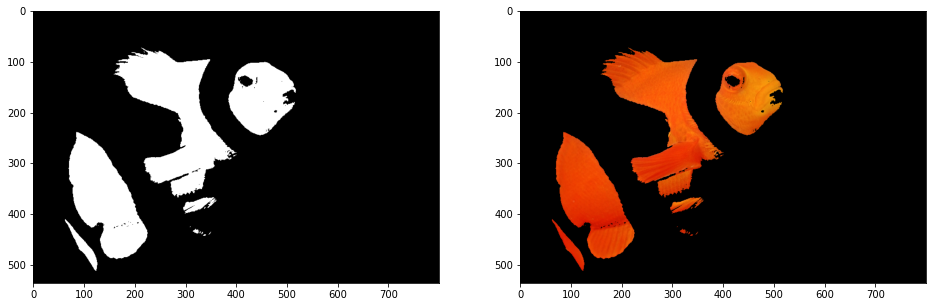

In [115]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.savefig('fig.jpg')
plt.show()

In [117]:
light_white = (0, 0, 200)
dark_white = (145, 60, 255)

In [118]:
lo_square = np.full((10, 10, 3), light_white, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_white, dtype=np.uint8) / 255.0

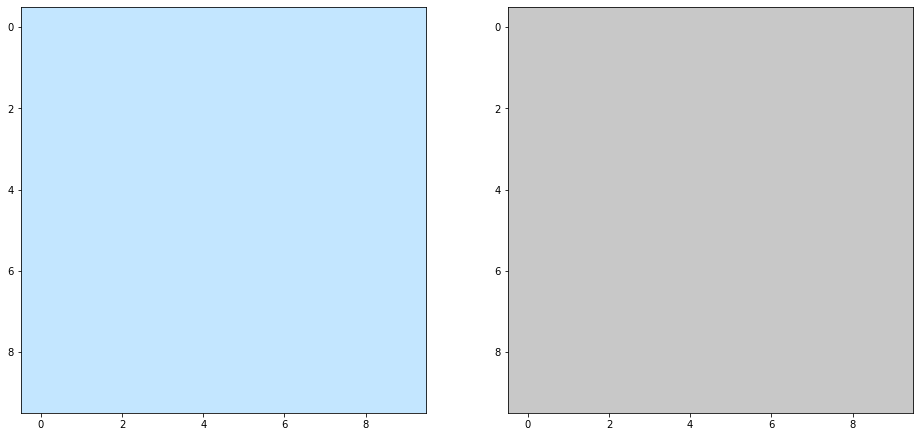

In [119]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.savefig('fig.jpg')
plt.show()

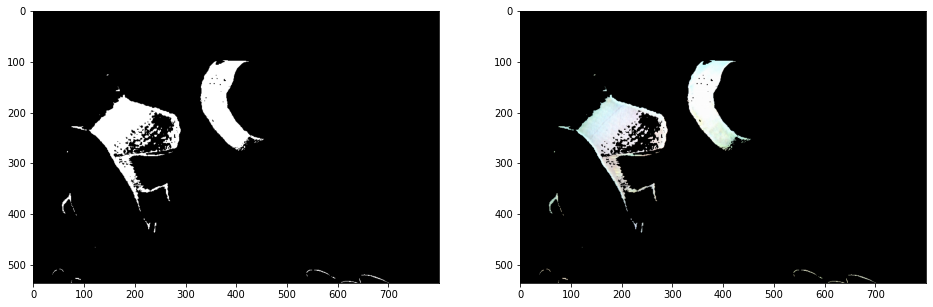

In [120]:
mask_white = cv2.inRange(hsv_nemo, light_white, dark_white)
result_white = cv2.bitwise_and(nemo, nemo, mask=mask_white)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(mask_white, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_white)
plt.savefig('fig.jpg')
plt.show()

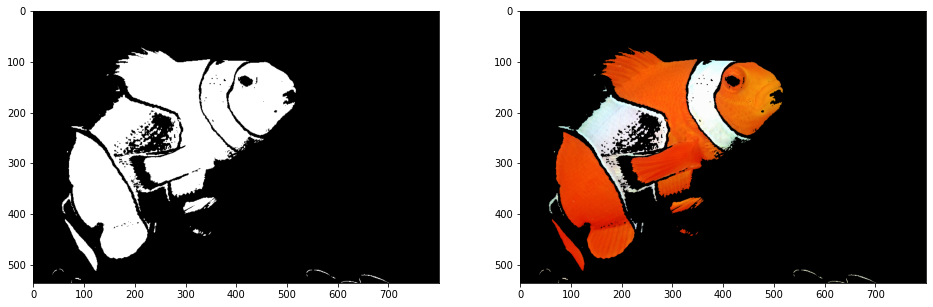

In [121]:
final_mask = mask + mask_white

final_result = cv2.bitwise_and(nemo, nemo, mask=final_mask)
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(final_mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(final_result)
plt.savefig('fig.jpg')
plt.show()

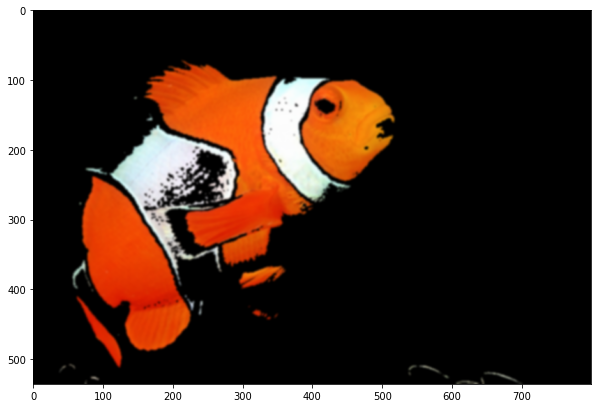

In [34]:
blur = cv2.GaussianBlur(final_result, (7, 7), 0)
plt.figure(figsize=(10, 8))
plt.imshow(blur)
plt.savefig('fig.jpg')
plt.show()

In [35]:
def segment_fish(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    light_orange = (1, 190, 200)
    dark_orange = (18, 255, 255)
    mask = cv2.inRange(hsv_image, light_orange, dark_orange)
    light_white = (0, 0, 200)
    dark_white = (145, 60, 255)
    mask_white = cv2.inRange(hsv_image, light_white, dark_white)
    final_mask = mask + mask_white
    result = cv2.bitwise_and(image, image, mask=final_mask)
    blur = cv2.GaussianBlur(result, (7, 7), 0)
    return blur

In [122]:
paths = ['nemo1.jpg', 'nemo2.jpg', 'nemo3.jpg']
nemo_friends = [cv2.cvtColor(cv2.imread(i), cv2.COLOR_BGR2RGB) for i in paths]


In [123]:
results = [segment_fish(friend) for friend in nemo_friends]

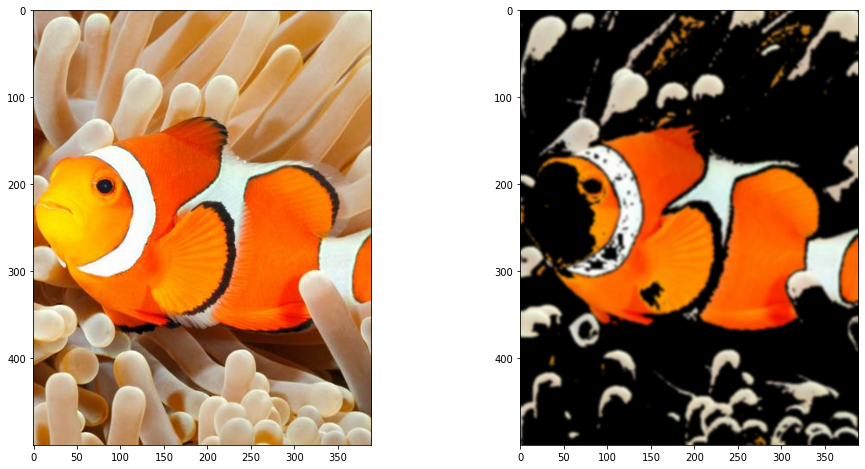

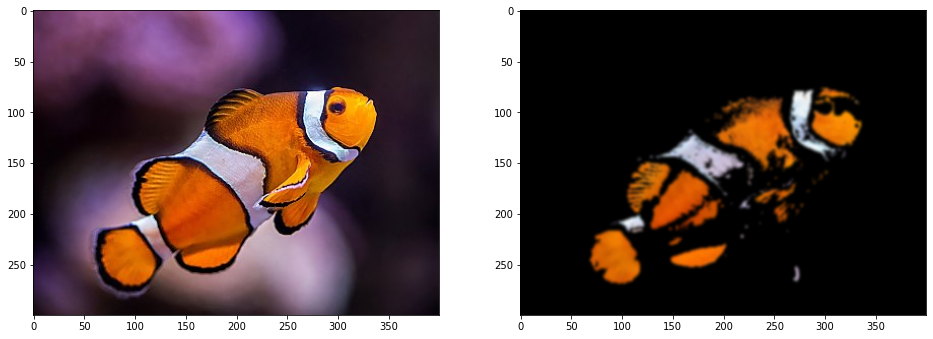

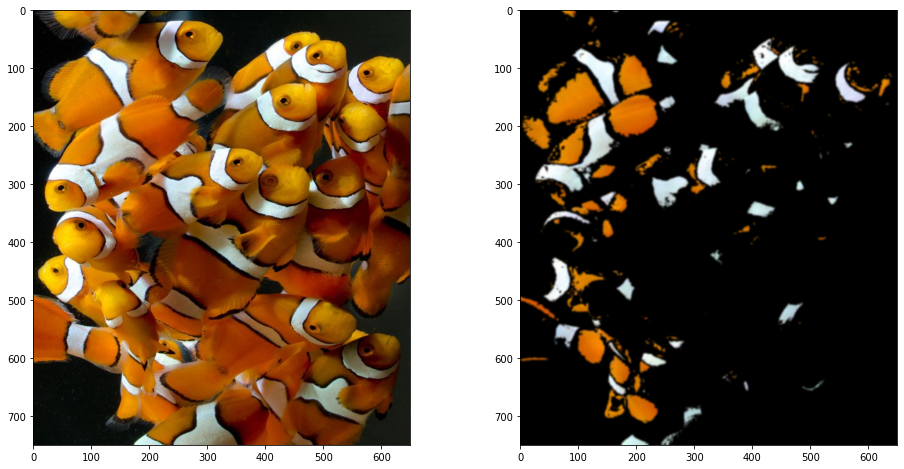

In [124]:
for i in range(3):
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(nemo_friends[i])
    plt.subplot(1, 2, 2)
    plt.imshow(results[i])
    plt.savefig(f'fig{i}.jpg')
    plt.show()

# Parking slot

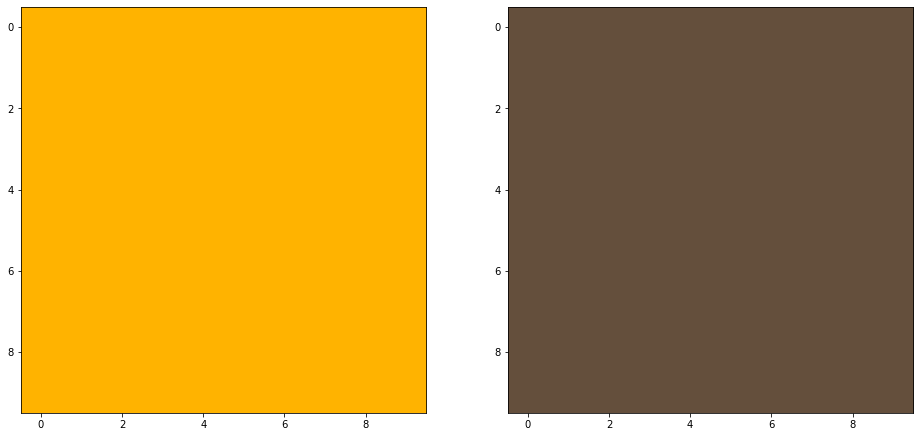

In [130]:
light_yellow = (20 , 100, 100)
dark_yellow = (30, 255, 255)
lo_square = np.full((10, 10, 3), light_yellow, dtype=np.uint8) / 255.0
do_square = np.full((10, 10, 3), dark_yellow, dtype=np.uint8) / 255.0
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(do_square))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(lo_square))
plt.savefig('fig.jpg')
plt.show()

In [127]:
def segment_parking_slot(image):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    light_yellow = (20 , 100, 100)
    dark_yellow = (30, 255, 255)

    mask = cv2.inRange(hsv_image, light_yellow, dark_yellow)

    result = cv2.bitwise_and(image, image, mask=mask)

    blur = cv2.GaussianBlur(result, (7, 7), 0)
    return mask, blur

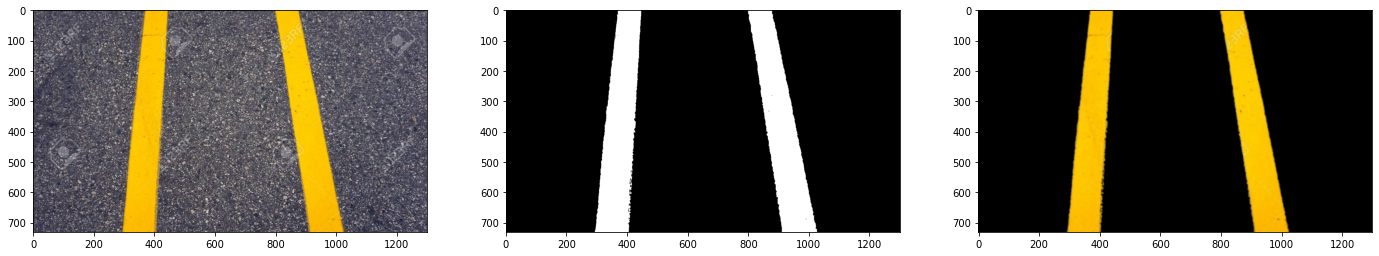

In [139]:
image = cv2.cvtColor(cv2.imread('parking_slot_line.webp'), cv2.COLOR_BGR2RGB)

mask, segmented = segment_parking_slot(image)
plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(segmented)
plt.savefig('fig.jpg')
plt.show()

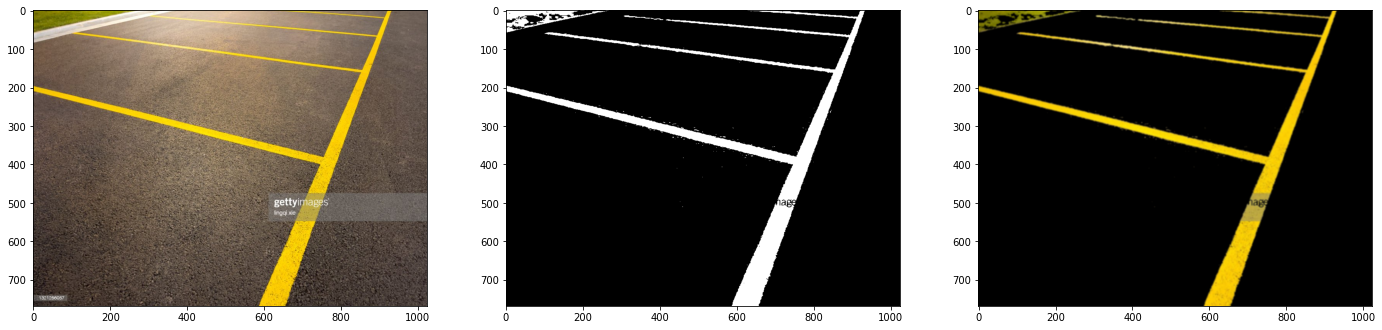

In [140]:
image = cv2.cvtColor(cv2.imread('parking_slot2.jpg'), cv2.COLOR_BGR2RGB)

mask, segmented = segment_parking_slot(image)
plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(segmented)
plt.savefig('fig.jpg')
plt.show()

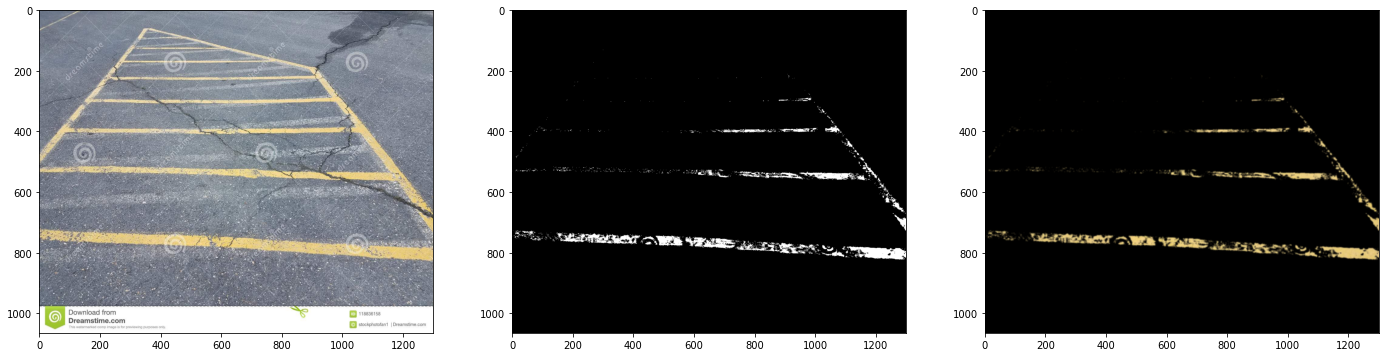

In [141]:
image = cv2.cvtColor(cv2.imread('parking_slot3.jpg'), cv2.COLOR_BGR2RGB)
mask, segmented = segment_parking_slot(image)
plt.figure(figsize=(24, 8))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.subplot(1, 3, 2)
plt.imshow(mask, cmap='gray')
plt.subplot(1, 3, 3)
plt.imshow(segmented)
plt.savefig('fig.jpg')
plt.show()